We will implement the KNN model on iris data set. Iris data set consist data of 3 species of iris flowers namely Setosa, Versicolour and Virginica. Each data point has 4 features and a label(species) associated with it. The features are
sepal_length, sepal_width, petal_length, petal_width. Based on these features, we need to predict the output label i.e the species of the flower.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Dataset gathering

You can download the iris data set from below link: https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv

In [ ]:
url="https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv"

In [ ]:
iris=pd.read_csv(url)

In [ ]:
iris.shape

(150, 5)

In [ ]:
iris.head(10)

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
5           5.4          3.9           1.7          0.4  setosa
6           4.6          3.4           1.4          0.3  setosa
7           5.0          3.4           1.5          0.2  setosa
8           4.4          2.9           1.4          0.2  setosa
9           4.9          3.1           1.5          0.1  setosa

In [ ]:
iris.tail()

sepal_length  sepal_width  petal_length  petal_width    species
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

# Step 2 Exploratory data analysis

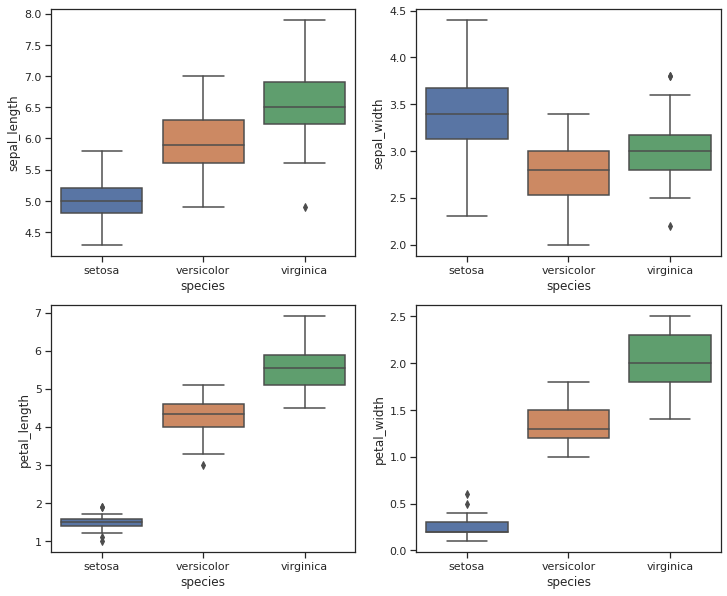

In [ ]:
sns.set(style="ticks") 
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x='species',y='sepal_length',data=iris)
plt.subplot(2,2,2)
sns.boxplot(x='species',y='sepal_width',data=iris)
plt.subplot(2,2,3)
sns.boxplot(x='species',y='petal_length',data=iris)
plt.subplot(2,2,4)
sns.boxplot(x='species',y='petal_width',data=iris)
plt.show()

In [ ]:
iris[20:25]

sepal_length  sepal_width  petal_length  petal_width species
20           5.4          3.4           1.7          0.2  setosa
21           5.1          3.7           1.5          0.4  setosa
22           4.6          3.6           1.0          0.2  setosa
23           5.1          3.3           1.7          0.5  setosa
24           4.8          3.4           1.9          0.2  setosa

We need to first separate the species(label) column from the data set.
X contains the features and Y contains the species.

In [ ]:
X=iris.drop(columns=['species'])
Y=iris['species']

In machine learning, we train our model on the train data and tune the hyper parameters(K for KNN)using the models performance on cross validation(CV) data. So lets split the data into train and CV data sets using the train_test_split() function in sklearn library.

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=20)

# Step 3 Data Preprocessing

Since KNN works based on distance between data points, its important that we standardize the data before training the model. Standardization helps in avoiding problems due to scale. We use StandardScaler() function from sklearn for data standardization. 

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_val)

array([[ 1.18652219, -0.53249156,  0.58615839,  0.27624394],
       [ 1.06524224,  0.17749719,  0.35852407,  0.27624394],
       [-1.11779688, -1.47914321, -0.26747033, -0.25414442],
       [ 0.21628258, -0.05916573,  0.58615839,  0.8066323 ],
       [-0.99651693,  0.88748593, -1.23491622, -1.04972696],
       [-1.11779688,  0.17749719, -1.29182481, -1.44751823],
       [-0.14755727, -1.00581738, -0.15365317, -0.25414442],
       [-0.14755727, -0.05916573,  0.2447069 ,  0.01104976],
       [ 0.45884248,  0.88748593,  0.92760988,  1.46961775],
       [ 0.70140238, -0.29582864,  0.30161548,  0.14364685],
       [ 0.33756253, -0.05916573,  0.64306697,  0.8066323 ],
       [ 0.58012243,  0.65082301,  0.52924981,  0.54143812],
       [ 1.67164199,  1.36081176,  1.32596996,  1.73481193],
       [-0.75395703,  0.88748593, -1.34873339, -1.31492114],
       [ 1.18652219, -0.05916573,  0.98451846,  1.20442357],
       [ 2.52060165,  1.83413758,  1.4966957 ,  1.07182648],
       [-0.99651693,  0.

# Step 4 Model Training

Now let’s train our KNN model using a random K value, say K=7. That means we consider 7 closest neighbors for making a prediction.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors =7)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

Lets check how well our trained model perform in predicting the labels of the cross validation data.

In [ ]:
y_pred = classifier.predict(X_val)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_val, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_val,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Accuracy: 0.9666666666666667


**Accuracy is 96%**

# Hyperparameter tuning

That means the model can accurately predict labels for 96% of the data points. Lets check if this accuracy can be improved by tuning the hyper parameter K for its optimal value.

In below code snippet, for each K value the model performance is evaluated using the F1-Score. F1-Score is a performance metric used for evaluating the model. Value of F1-Score is in range 0–1. The model performance increases with increase in F1-Score. 

In [ ]:
from sklearn import neighbors 
from sklearn.metrics import f1_score,confusion_matrix,roc_auc_score
f1_list=[]
k_list=[]
for k in range(1,10):
    clf=neighbors.KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
    clf.fit(X_train,y_train)
    pred=clf.predict(X_val)
    f=f1_score(y_val,pred,average='macro')
    f1_list.append(f)
    k_list.append(k)

**Plot F1 score vs k-value**

Text(0, 0.5, 'f1 score')

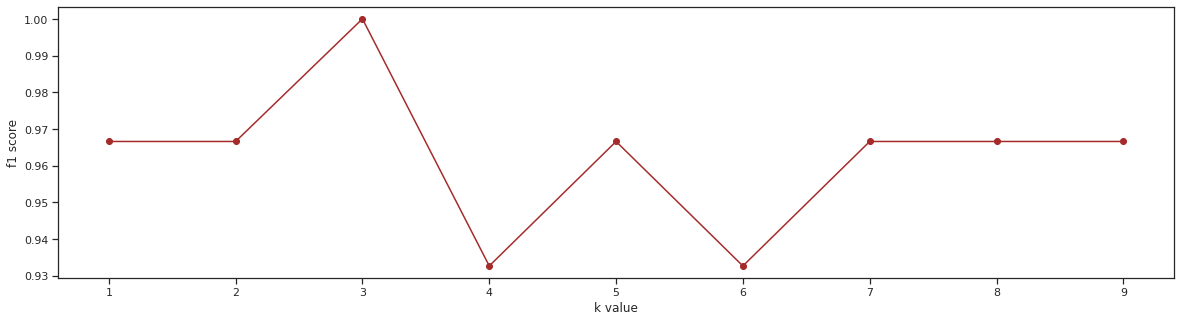

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20,5))
plt.plot(k_list,f1_list,marker='o',color='brown')
plt.xlabel("k value")
plt.ylabel("f1 score")

**Highest F1 score is at k=3**
Let’s get the best K value that gives the maximum F1-Score

In [ ]:
best_f1_score=max(f1_list)
best_k=k_list[f1_list.index(best_f1_score)]        
print("Optimum K value=",best_k," with F1-Score=",best_f1_score)

Optimum K value= 3  with F1-Score= 1.0


# Step 5: Performance Analysis

Now let’s predict using the best K value i.e. K=3 and check the accuracy

In [ ]:
KNN_model=neighbors.KNeighborsClassifier(n_neighbors=3,n_jobs=-1)
KNN_model.fit(X_train,y_train)
y_new_pred=KNN_model.predict(X_val)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
newresult = confusion_matrix(y_val, y_new_pred)
print("Confusion Matrix:")
print(newresult)
newresult1 = classification_report(y_val, y_new_pred)
print("Classification Report:",)
print (newresult1)
newresult2 = accuracy_score(y_val,y_new_pred)
print("Accuracy:",newresult2)

Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.0


**Accuracy is 100%**